In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from segmentImg import segmentGivenImage
import matplotlib.pyplot as plt
import cv2
import os
import glob

In [9]:
def predictImage(modelName,imagePath):
    model = load_model(modelName)
    input_map = dict()
    c = 'a'
    for i in range(26):
        input_map[i] = c
        c = chr(ord(c)+1)

    path = imagePath
    segmentGivenImage(path)

    folder = 'segmented_img/img1'
    images = []
    for filename in sorted(os.listdir(folder)):
        img = cv2.imread(os.path.join(folder,filename),0)
        if img is not None:   
            img = 255 - img
            img = img.astype('float32')
            img/=255
            pred = model.predict(img.reshape(1,28,28,1))  
            plt.figure()
            plt.imshow(img,cmap='Greys')
            plt.show()
            print("Prediction ",input_map[pred.argmax()])
            print()     
    files = glob.glob(folder+'/*')
    for f in files:
        os.remove(f)

In [10]:
def inputImageViz(path):
    img = cv2.imread(os.path.join(path),0)
    img = 255 - img
    plt.figure()
    plt.imshow(img,cmap='Greys')        
    plt.show()

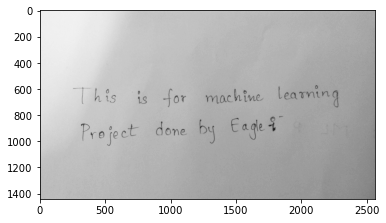

In [17]:
inputImageViz('img.jpg')

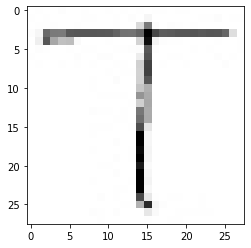

Prediction  t



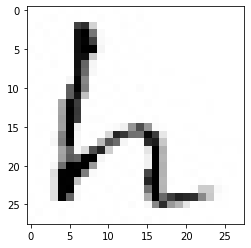

Prediction  k



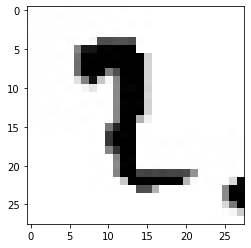

Prediction  z



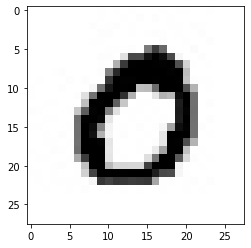

Prediction  o



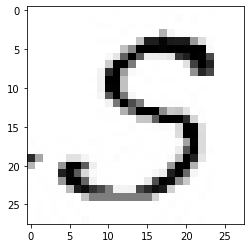

Prediction  s



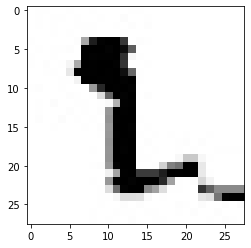

Prediction  l



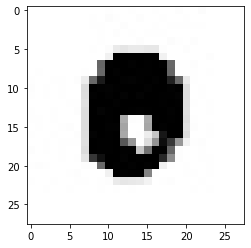

Prediction  o



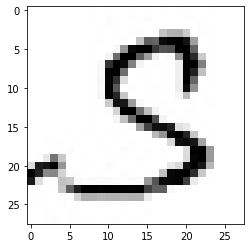

Prediction  s



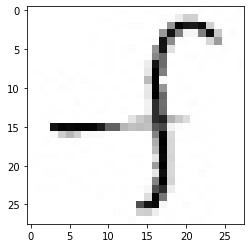

Prediction  y



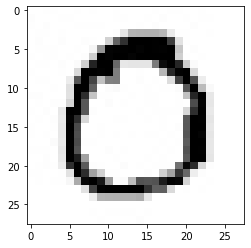

Prediction  o



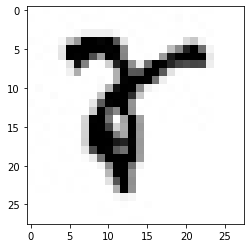

Prediction  u



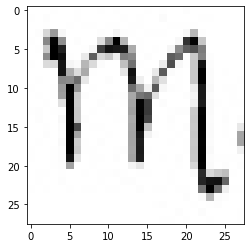

Prediction  m



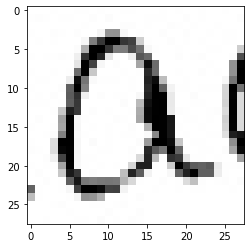

Prediction  q



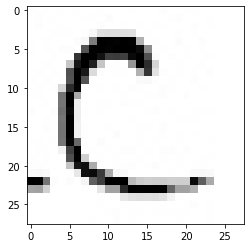

Prediction  c



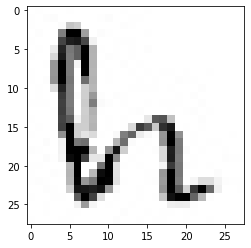

Prediction  w



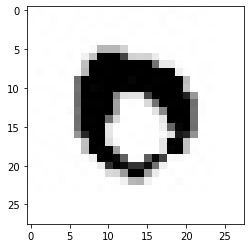

Prediction  o



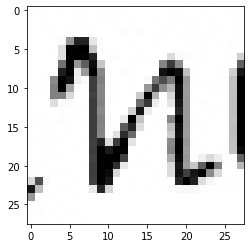

Prediction  w



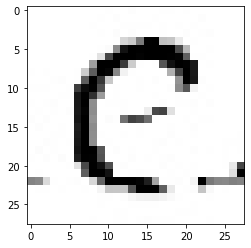

Prediction  c



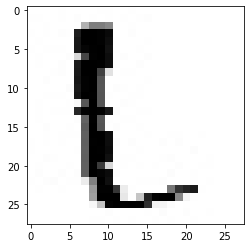

Prediction  l



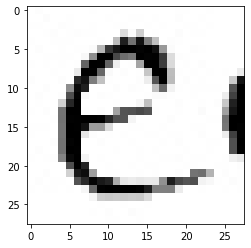

Prediction  e



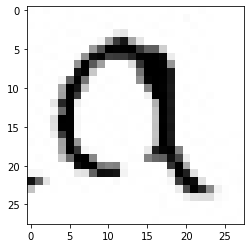

Prediction  q



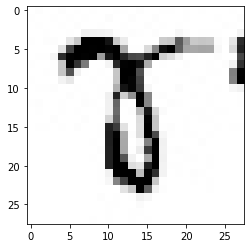

Prediction  t



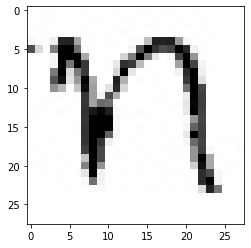

Prediction  m



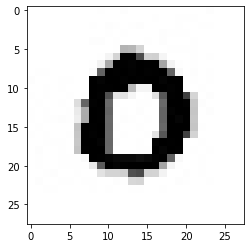

Prediction  o



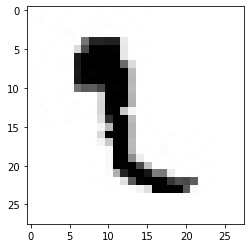

Prediction  l



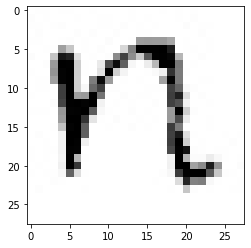

Prediction  n



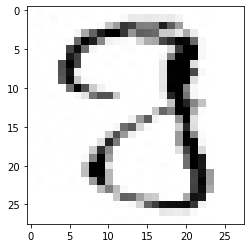

Prediction  z



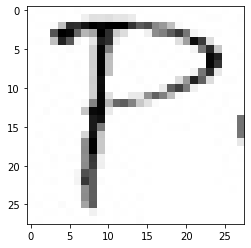

Prediction  p



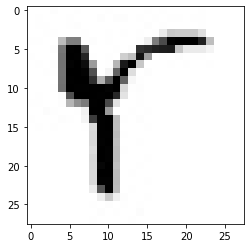

Prediction  t



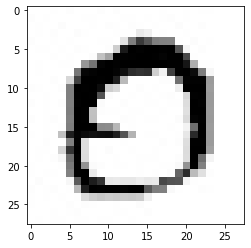

Prediction  o



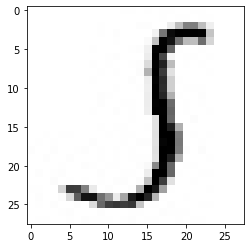

Prediction  j



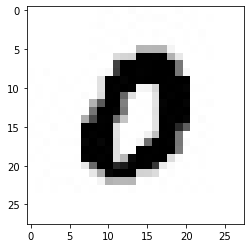

Prediction  o



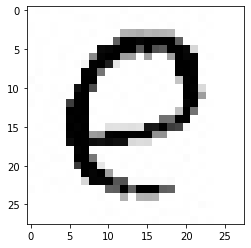

Prediction  q



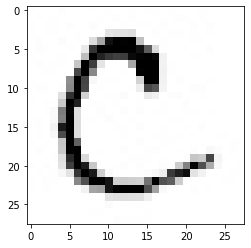

Prediction  c



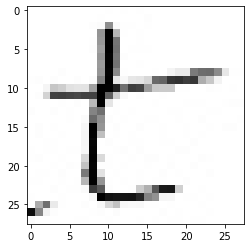

Prediction  k



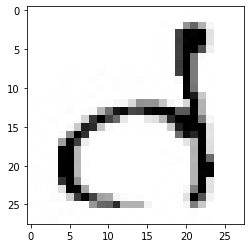

Prediction  h



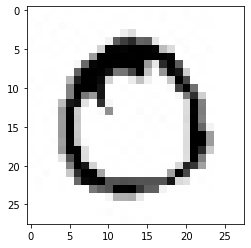

Prediction  o



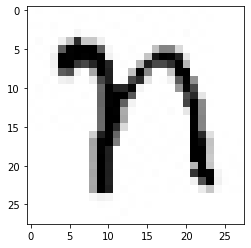

Prediction  y



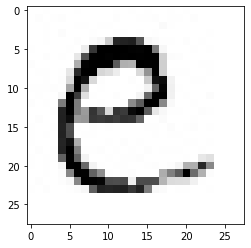

Prediction  c



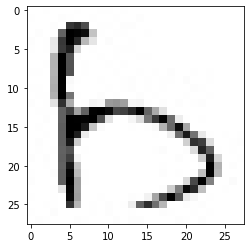

Prediction  h



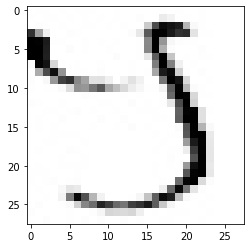

Prediction  y



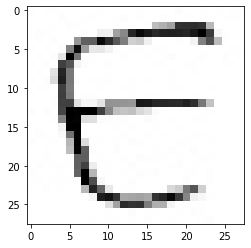

Prediction  e



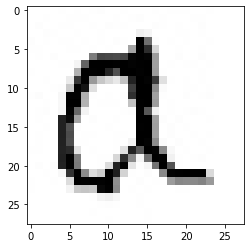

Prediction  q



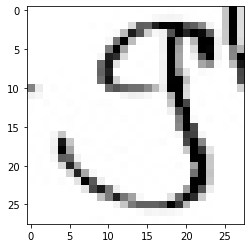

Prediction  s



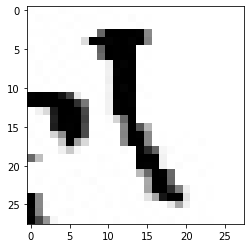

Prediction  y



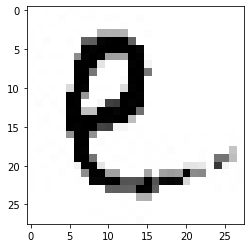

Prediction  e



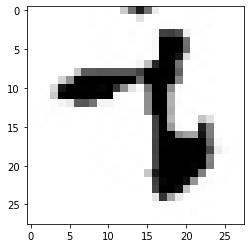

Prediction  t



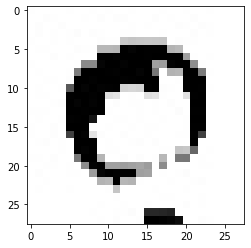

Prediction  o



In [18]:
predictImage('charRecognization2.h5','img.jpg')